# Predicting Medical Insurance Costs with Regression Modeling

This notebook explores a dataset of U.S. medical insurance charges to build predictive models and extract insights. We apply exploratory data analysis, feature engineering, and multiple regression models to estimate individual insurance costs based on demographic and health factors.

**Goals:**
- Perform EDA to understand feature relationships
- Engineer new features to improve predictive power
- Compare multiple regression models
- Evaluate model performance using cross-validation


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


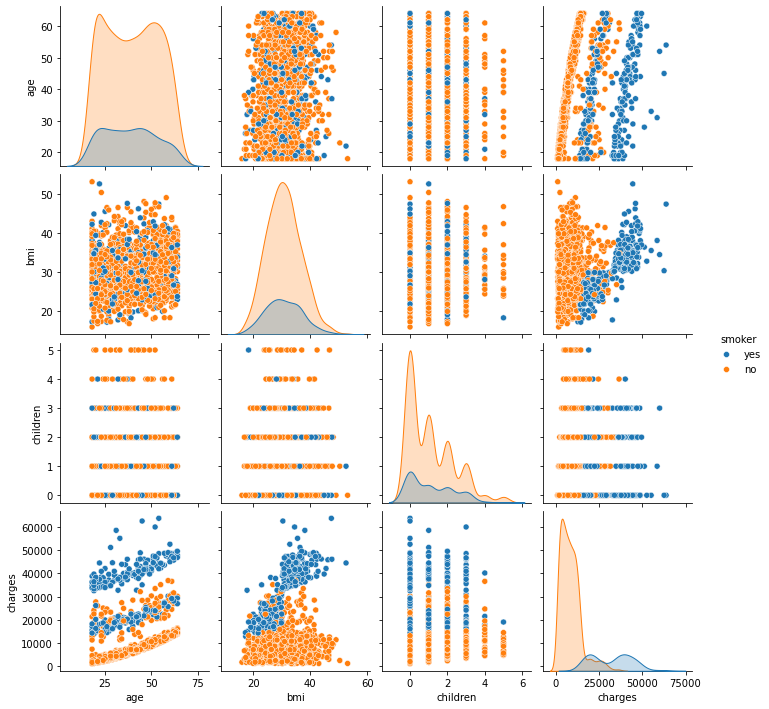

In [2]:
df.info()
df.describe()
sns.pairplot(df, hue='smoker')
plt.show()

## Feature Engineering

In [3]:
df['bmi_over_30'] = (df['bmi'] > 30).astype(int)
df['is_male'] = (df['sex'] == 'male').astype(int)
df['is_smoker'] = (df['smoker'] == 'yes').astype(int)
df['is_southeast'] = (df['region'] == 'southeast').astype(int)
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_over_30,is_male,is_smoker,is_southeast
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0


## Model Building with Preprocessing Pipeline

In [4]:
X = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1)
y = df['charges']

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['bmi_over_30', 'is_male', 'is_smoker', 'is_southeast']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f'{name}: R2 mean = {scores.mean():.4f}, std = {scores.std():.4f}')

LinearRegression: R2 mean = 0.7517, std = 0.0255
Ridge: R2 mean = 0.7517, std = 0.0251
Lasso: R2 mean = 0.7517, std = 0.0255
RandomForest: R2 mean = 0.8316, std = 0.0304


## Conclusion
The notebook demonstrates how regression modeling can predict medical insurance charges based on user characteristics. By engineering features and evaluating several models, we observed that ensemble methods like Random Forest outperform linear models in capturing non-linear patterns.